### Employee Attrition and Performance Analysis

In [263]:
#### importing the required packages
import pandas as pd
import numpy as np
import pandas
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

from sklearn import preprocessing
from sklearn.utils import resample
from imblearn import over_sampling as os
from imblearn.over_sampling import SMOTE
from imblearn import pipeline as pl
from imblearn.metrics import (geometric_mean_score,make_index_balanced_accuracy)
from sklearn.metrics import recall_score,matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost.sklearn import XGBClassifier 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import accuracy_score,roc_auc_score

In [264]:
hr_data = pd.read_excel('data/HR-Employee-Attrition.xlsx') #### read in the excel data

In [265]:
print(hr_data.shape) # 1470 employees with 35 predictors
print(hr_data.columns) # 35 features

(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [266]:
# set the option to display all the columns of a dataframe....
pandas.set_option('display.max_columns',None)


In [267]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [268]:
hr_data.iloc[:10,:10] #the dataset 


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13


In [269]:
cols_to_remove = ['EmployeeCount','Over18','StandardHours','EmployeeNumber','JobLevel'] ### remove the unnecessary columns
hr_data = hr_data.drop(hr_data[cols_to_remove],axis=1)
len(hr_data.columns)

30

In [270]:
# creating a list of categorical variables
cat_var = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','JobInvolvement','Gender','JobRole','JobSatisfaction',
'MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','StockOptionLevel']

In [271]:
len(cat_var)

15

In [272]:
# converting the object data type to category dtype
for var in cat_var:
    hr_data[var] = hr_data[var].astype('category')

In [273]:
### creating a new dataframe with all categorical descriptions
hr_desc = hr_data.copy()

In [274]:
#### mapping all data with those description so as to analyze
Education_desc = {1 : 'Below College', 2 : 'College' , 3 : 'Bachelor' , 4 : 'Master' , 5 : 'Doctor'}
EnvironmentSatisfaction_desc = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' , 4 : 'Very High'}
JobInvolvement_desc  = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
JobSatisfaction_desc = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
PerformanceRating_desc = {1 :'Low' , 2 : 'Good' , 3 : 'Excellent' , 4 : 'Outstanding'}
RelationshipSatisfaction_desc  = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
WorkLifeBalance_desc = {1 : 'Bad' , 2 : 'Good' , 3 : 'Better' ,4 : 'Best'}


In [275]:
hr_desc['Education'].replace(Education_desc,inplace=True)
hr_desc['EnvironmentSatisfaction'] = hr_desc['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_desc)
hr_desc['JobInvolvement'] = hr_desc['JobInvolvement'].map(JobInvolvement_desc)
hr_desc['JobSatisfaction'] = hr_desc['JobSatisfaction'].map(JobSatisfaction_desc)
hr_desc['PerformanceRating'] = hr_desc['PerformanceRating'].map(PerformanceRating_desc)
hr_desc['RelationshipSatisfaction'] = hr_desc['RelationshipSatisfaction'].map(RelationshipSatisfaction_desc)
hr_desc['WorkLifeBalance'] = hr_desc['WorkLifeBalance'].map(WorkLifeBalance_desc)

In [276]:
hr_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null category
DailyRate                   1470 non-null int64
Department                  1470 non-null category
DistanceFromHome            1470 non-null int64
Education                   1470 non-null object
EducationField              1470 non-null category
EnvironmentSatisfaction     1470 non-null object
Gender                      1470 non-null category
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null object
JobRole                     1470 non-null category
JobSatisfaction             1470 non-null object
MaritalStatus               1470 non-null category
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTi

In [277]:
obj_cols =hr_desc.select_dtypes(include=['object'])
for var in obj_cols:
    hr_desc[var] = hr_desc[var].astype('category') 


In [278]:
del_col = ['DailyRate','MonthlyRate','HourlyRate'] # deleting dailyrate,monthly rate and hourly rate columns 
hr_desc = hr_desc.drop(hr_desc[del_col],axis=1) 

### there are 16 categorical columns and 11 numeric columns

### data exploration and analysis

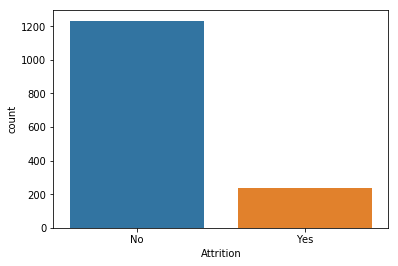

In [279]:
sns.countplot(x='Attrition',data=hr_desc);  ####  the employee attrition is 
hr_desc.Attrition.value_counts();
plt.savefig('attrition1');
plt.show()

#### there is 17% attrition rate in the dataset  - 237 out of 1470 totally

### would like to see what factors make these employee resign their jobs

In [280]:
hr_desc.groupby('Attrition').mean()


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,
No,37.561233,8.915653,6832.739659,2.645580,15.231144,11.862936,2.832928,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,10.632911,4787.092827,2.940928,15.097046,8.244726,2.624473,5.130802,2.902954,1.945148,2.852321


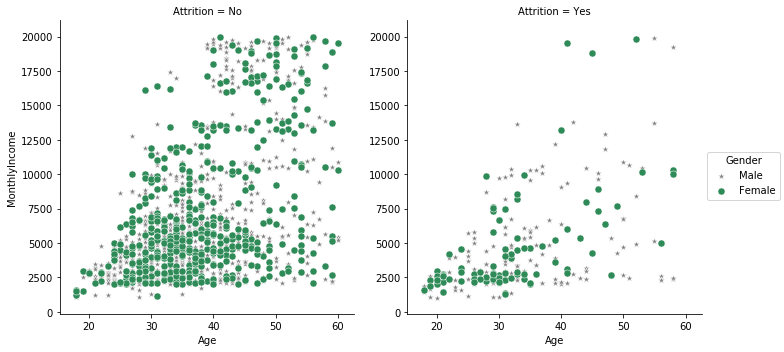

In [281]:
'''_ = sns.FacetGrid(hr_desc['Attrition'], hr_desc['Age'],hue=hr_desc.Gender);
plt.title("Age Vs Attrition ")
#sns.despine()
plt.show()'''

kws = dict(s=50, linewidth=.5, edgecolor="w")
pal = dict(Male="gray", Female="Seagreen")
g = sns.FacetGrid(hr_desc, col="Attrition",  hue="Gender",size=5,palette=pal,
                  hue_order=['Male','Female'],hue_kws=dict(marker=["*", "o"]))
g = (g.map(plt.scatter, "Age","MonthlyIncome",**kws).add_legend());
plt.savefig('monthlyincomevsage')
plt.show()


###  the average age of customers who changed jobs are less than those who didn't

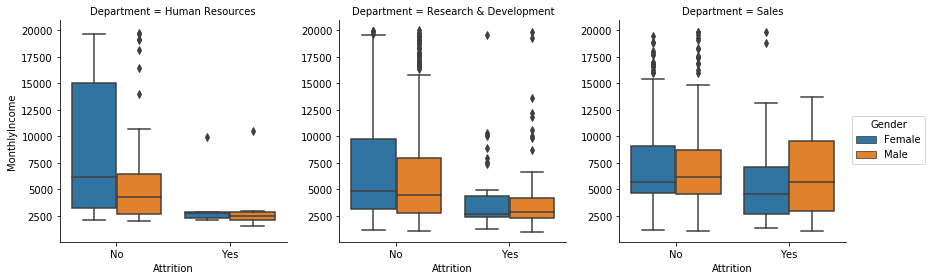

In [282]:
sns.factorplot(data=hr_desc,x='Attrition',y='MonthlyIncome',hue='Gender',col='Department',kind='box');
plt.show()

#### male attrition seems to be more in sales department than the females.

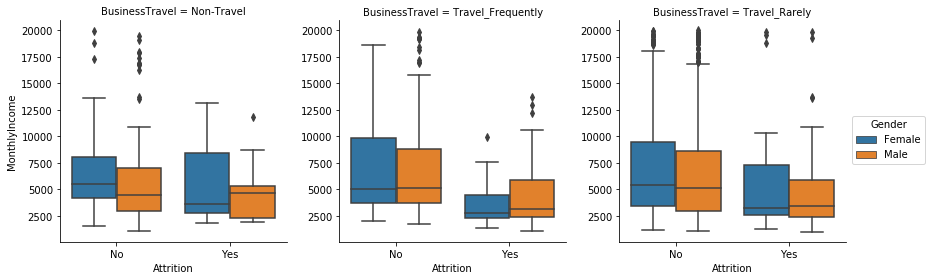

In [283]:
sns.factorplot(data=hr_desc , x= 'Attrition', y= 'MonthlyIncome' ,hue= 'Gender',col= 'BusinessTravel', kind='box');
plt.show()

### attrition seems to be more among female when there are no travel...

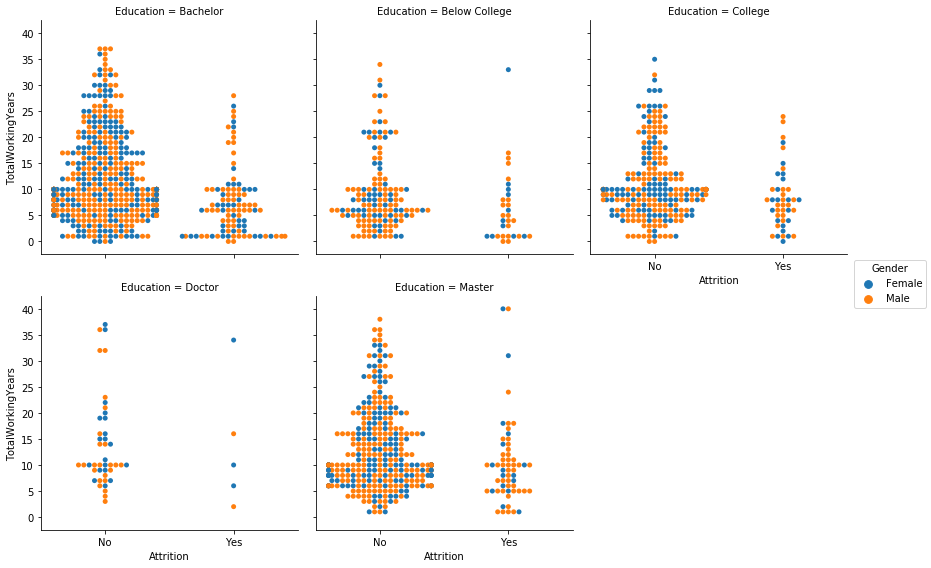

In [284]:
sns.factorplot(data=hr_desc,x='Attrition',y='TotalWorkingYears', hue ='Gender',col = 'Education',col_wrap=3,kind='swarm');
plt.savefig("Education")

### attrition seems to be more among male's who have bachelor's degree and it increase's with experience

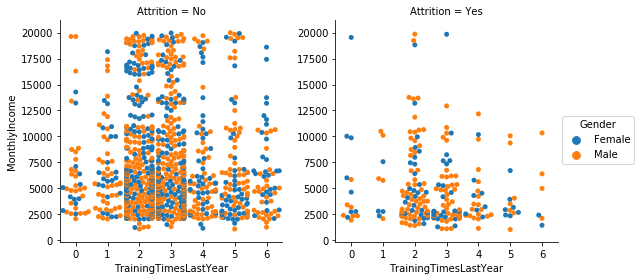

In [285]:
sns.factorplot(data=hr_desc,x='TrainingTimesLastYear',y='MonthlyIncome', hue ='Gender',col = 'Attrition',kind='swarm');
plt.savefig('TrainingTimesvsmonthlyincome')

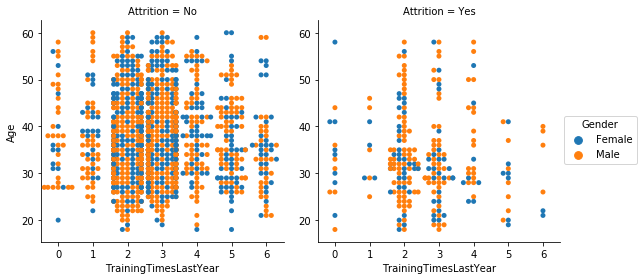

In [286]:
sns.factorplot(data=hr_desc,x='TrainingTimesLastYear',y='Age', hue ='Gender',col = 'Attrition',kind='swarm');
plt.savefig('TrainingTimesvsAge')

### Even after attending 2-3 trainings the previous year, employees below 35 and whose monthly income is less than 5000 tend to change jobs frequently 

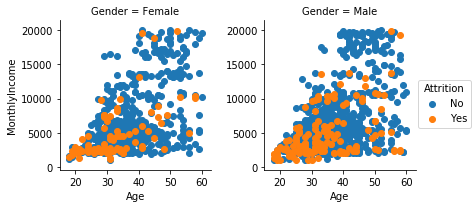

In [287]:
g =sns.FacetGrid(data=hr_desc,col='Gender',hue='Attrition',legend_out=True);
g = (g.map(plt.scatter,'Age','MonthlyIncome').add_legend());
g.savefig('monthlyincomevsage')


### attrition seems to be more in male employees who are below 40 years whose salary expectations are not met with!!! 

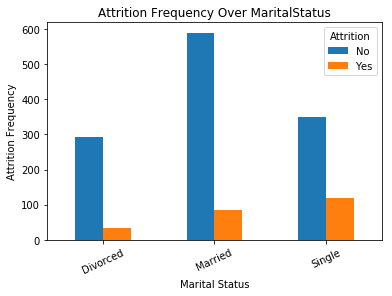

In [288]:
pd.crosstab(hr_desc.MaritalStatus,hr_desc.Attrition).plot(kind='bar');
plt.title("Attrition Frequency Over MaritalStatus");
plt.xticks(rotation=25);
plt.xlabel('Marital Status');
plt.ylabel('Attrition Frequency');
plt.savefig('attritionvsmaritalstatus')

### single people tend to change jobs frequently

In [289]:
hr_desc.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,High,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,Very High,Male,Medium,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very High,Female,High,Research Scientist,High,Married,2909,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Below College,Medical,Low,Male,High,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2


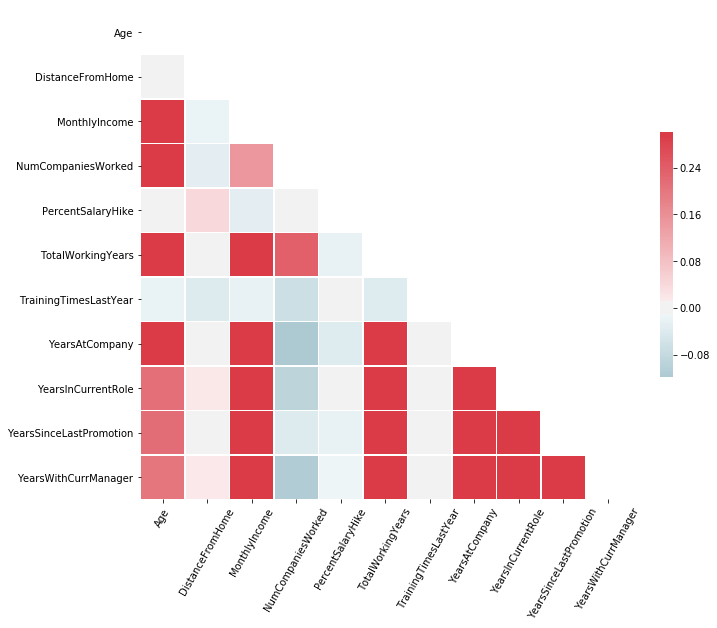

In [290]:
# Compute the correlation matrix
corr = hr_desc.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('corr_heatmap');
plt.xticks(rotation=60);
plt.show()

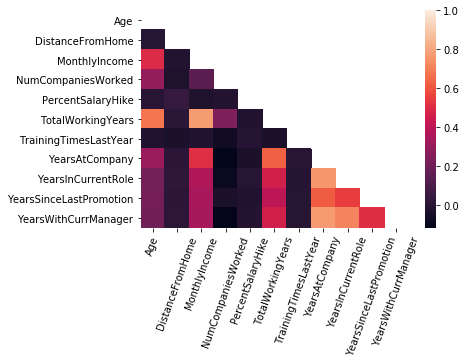

In [291]:
### see the correlation among features using correlation matrix
corr = hr_desc.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask=mask,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values);
plt.xticks(rotation=70);
plt.savefig('heatmap');
plt.show()


##### An employee's age,the total number of years he has worked ,number of years he has worked in a 
##### company,in current role,years since last promotion and monthly income seems to have high correlation  

In [292]:
    
hr_desc.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Pandas has a function which can turn a categorical variable into a series of zeros and ones, which 
#### makes them a lot easier to quantify and compare.(get_dummies)

In [293]:
# creating dummies for cat columns   -- one hot encoding  
for var in cat_var:
    cat_list = 'var' + '_' +var
    cat_list = pd.get_dummies(hr_desc[var],prefix=var)
    hr1 =hr_desc.join(cat_list)
    hr_desc = hr1

In [294]:
# creating a list of variables
hr_vars=hr_desc.columns.values.tolist()
to_keep=[i for i in hr_vars if i not in cat_var]
print(len(hr_vars))
print(len(to_keep))
hr_final = hr_desc[to_keep] ## 18 columns dropped as dummies were created for them..
hr_final_vars = hr_final.columns.values.tolist() # creating a list of final variables


86
71


## there are 71 predictors now and the data needs to be normalized

In [295]:
y = hr_final['Attrition'].cat.codes ## target variable
X = hr_final.drop('Attrition',axis=1) # excluding the target variable Attrition - 70 columns

### normalizing the data before feature selection

### using preprocessing package and Mix Max scaler method

In [296]:
#x = hr_final[X].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler() 
X_scaled = min_max_scaler.fit_transform(X)
df_scaled = pandas.DataFrame(X_scaled) # scaled data frame 
df_scaled.columns = X.columns

In [297]:
len(df_scaled.columns) ## total 71 features excluding the target variable 

70

In [298]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y ,test_size = .3,random_state=12) ### train test split the data first

## Feature Selection
### Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a ## model and choose either the best or worst performing feature, setting the feature aside ### and then repeating the process with the rest of the features. This process is applied ##until all features in the dataset are exhausted.
### The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [299]:
logreg = LogisticRegression() ### instantiating a log reg classifier
rfe = RFE(logreg)     
rfe = rfe.fit(df_scaled , y)
print(rfe.support_) ### the features selected by RFE
print(rfe.ranking_) ### ranking for various features

[ True  True  True  True False  True  True  True  True  True  True  True
  True False False  True False False False False  True False False  True
 False  True  True  True False  True False False False  True False  True
 False False  True False  True False False  True False False  True False
  True False  True False False False  True  True False False False  True
 False False  True False  True False  True  True  True False]
[ 1  1  1  1 12  1  1  1  1  1  1  1  1 30 35  1 19 13 21 32  1 31 18  1 17
  1  1  1 10  1 11  9  3  1 33  1  2 22  1  5  1  8  7  1 26 28  1 29  1 34
  1 20 25  4  1  1 27 36 16  1 15 14  1 23  1 24  1  1  1  6]


In [300]:
rfe.n_features_

35

In [301]:
### find the columns which has high ranking.... 
cols = df_scaled.loc[:,rfe.support_].columns.tolist()
X = df_scaled[cols]   ### selected features of the model

In [302]:
X.columns ### the features selected my RFE 

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'Department_Research & Development', 'Education_Doctor',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_Low', 'JobInvolvement_Low',
       'JobInvolvement_Very High', 'JobRole_Healthcare Representative',
       'JobRole_Laboratory Technician', 'JobRole_Research Director',
       'JobRole_Sales Representative', 'JobSatisfaction_Low',
       'JobSatisfaction_Very High', 'OverTime_No', 'OverTime_Yes',
       'RelationshipSatisfaction_Low', 'WorkLifeBalance_Bad',
       'WorkLifeBalance_Better', 'StockOptionLevel_0', 'StockOptionLevel_1',
       'StockOptionLevel_2'],
      dtyp

### upsampling the data -- trying to balance the classes

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = .3,random_state=12)

In [304]:
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 1233, 1: 237})


In [305]:
train_data = X_train ## upsampling done on the training data to avoid leakage.. 
train_data['Attrition'] = y_train
### train_data needs to be upsampled...

train_data_majority = train_data[train_data.Attrition == 0]
train_data_minority = train_data[train_data.Attrition==1]



# Upsample minority class
train_data_minority_upsampled = resample(train_data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=863,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_data_majority, train_data_minority_upsampled])

train_upsampled.Attrition.value_counts()

print("upsampled data   :" , train_upsampled.Attrition.value_counts())

### split the training set again
# Separate input features (X) and target variable (y)
X_train = train_upsampled.drop('Attrition' , axis=1)
y_train = train_upsampled.Attrition


upsampled data   : 1    863
0    863
Name: Attrition, dtype: int64


C:\Users\Suhasini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [306]:
lg_model = logreg.fit(X_train,y_train) # fit the model on training data
y_pred = logreg.predict(X_test) # predict on the hold out set ..

print(confusion_matrix(y_test,y_pred))

tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

print("Confusion Matrix : ")
print("------------------")
print("True Negatives : " , tn)
print("False Positives  :" , fp)
print("False Negatives  :" , fn)
print("True Positives :" , tp)

#print("accuracy of logistic regression classifier on test set : {:.2f}".format(logreg.score(X_test,y_test)))
#print("---------------")
print("Evaluate model accuracy (Logistic Regression) :" , round(accuracy_score(y_test,y_pred),3))
print("---------------")
print("Matthews coefficient : " , matthews_corrcoef(y_test,y_pred))
print("---------------")
print("Classification Report : " )
print(classification_report(y_test,y_pred))
print("---------------")
y_pred_proba = logreg.predict_proba(X_test)[:,1]
print("Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores: ", roc_auc_score(y_test,y_pred) )

print("----------------")
cv_scores = cross_val_score(logreg,X_train,y_train,cv=5,scoring='roc_auc')
print("Cross Validation Scores : " , cv_scores)




[[302  68]
 [ 22  49]]
Confusion Matrix : 
------------------
True Negatives :  302
False Positives  : 68
False Negatives  : 22
True Positives : 49
Evaluate model accuracy (Logistic Regression) : 0.796
---------------
Matthews coefficient :  0.421523188933
---------------
Classification Report : 
             precision    recall  f1-score   support

          0       0.93      0.82      0.87       370
          1       0.42      0.69      0.52        71

avg / total       0.85      0.80      0.81       441

---------------
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores:  0.753178530643
----------------
Cross Validation Scores :  [ 0.8941829   0.85482308  0.84082328  0.87043672  0.89010952]


## The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of true positives and ``fp`` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

## The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of true positives and ``fn`` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [308]:
### roc auc curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_logreg')
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

### The auc roc curve is .75 which generalizes the model as it nears 1...